In [15]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

In [2]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


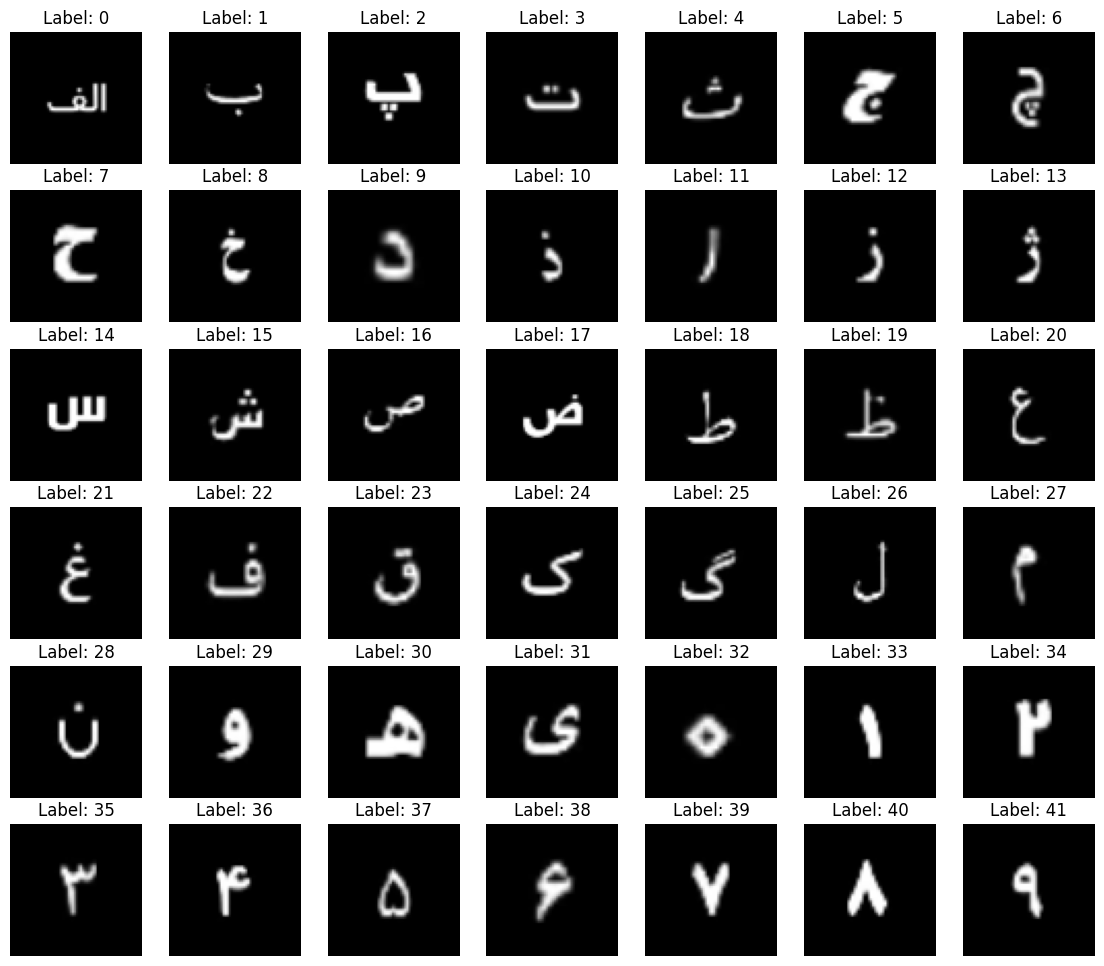

In [18]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, zoom=0.5, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [6]:
# SVM Bagging Classifier

# >> Best Params : {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
# >> Best Score : 0.9360287397176805

svm = SVC(C=100, degree=2, gamma='scale', kernel='rbf')
svm_bagging = BaggingClassifier(svm, n_estimators=50, bootstrap=True, n_jobs=-1, random_state=42, verbose=2)

svm_bagging.fit(X_train_1d, y_train)
svm_bagging.score(X_test_1d, y_test)

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   38.0s remaining:  3.6min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   44.3s remaining:   18.9s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   45.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   24.4s remaining:  2.3min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   30.1s remaining:   12.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   30.5s finished


0.95

In [8]:
# Decision Tree Bagging Classifier

# >> Best Params : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
# >> Best Score : 0.8479143393927085

tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2)

tree_bagging = BaggingClassifier(tree, n_estimators=50, bootstrap=True, n_jobs=-1, random_state=42, verbose=2)

tree_bagging.fit(X_train_1d, y_train)
tree_bagging.score(X_test_1d, y_test)

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    7.6s remaining:   43.8s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    9.7s remaining:    4.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    9.8s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished


0.922093023255814

In [22]:
# KNN Bagging Classifier

# >> Best Params : {'metric': 'euclidean', 'n_neighbors': 3, 'p': 0.5, 'weights': 'distance'}
# >> Best Score : 0.8801995531633999

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=0.5, weights='distance')

knn_bagging = BaggingClassifier(knn, n_estimators=50, bootstrap=True, random_state=42, verbose=2)

knn_bagging.fit(X_train_1d, y_train)
knn_bagging.score(X_test_1d, y_test)

Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

0.9093023255813953